# Import libraries

In [1]:
from scipy.stats import spearmanr
import pandas as pd
from scipy.io import loadmat
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cancer type

In [2]:
cancer_type = 'OV'

# Read in mRNA data

In [3]:
rna_raw_data = f'{cancer_type}__geneExp.txt'
rna_df = pd.read_csv(rna_raw_data,sep='\t', engine='python')
rna_df

,GeneSymbol,EntrezID,TCGA-04-1348-01A-01R-1565-13,TCGA-04-1357-01A-01R-1565-13,TCGA-04-1362-01A-01R-1565-13,TCGA-04-1364-01A-01R-1565-13,TCGA-04-1365-01A-01R-1565-13,TCGA-04-1514-01A-01R-1566-13,TCGA-04-1519-01A-01R-1565-13,TCGA-09-0364-01A-02R-1564-13,...,TCGA-61-2102-01A-01R-1568-13,TCGA-61-2104-01A-01R-1568-13,TCGA-61-2109-01A-01R-1568-13,TCGA-61-2110-01A-01R-1568-13,TCGA-61-2111-01A-01R-1568-13,TCGA-61-2113-01A-01R-1568-13,TCGA-OY-A56P-01A-12R-A406-31,TCGA-OY-A56Q-01A-11R-A406-31,TCGA-VG-A8LO-01A-11R-A406-31,TCGA-WR-A838-01A-12R-A406-31
0,?,100133144,27.3245,21.9661,27.2611,18.6062,12.9998,3.5924,23.9875,25.9322,...,6.2856,25.4036,51.1181,25.4693,9.0243,26.7564,39.9677,32.3559,42.6347,156.2168
1,?,100134869,45.8134,36.6276,53.1619,14.4677,9.2994,11.6638,27.1918,49.5021,...,5.1100,51.9425,77.6188,86.4888,12.5908,15.8749,47.3948,28.2906,51.4148,104.8366
2,?,10357,24.0979,9.1146,32.1030,30.2498,68.5460,28.7075,38.6293,65.7950,...,25.1902,9.3525,22.8675,4.4259,16.6376,6.2899,14.9612,30.2799,23.1581,32.6951
3,?,10431,1509.2767,696.6146,1056.4202,1372.5640,1458.1889,1059.8733,1179.3502,557.4006,...,1233.7201,872.0951,793.4010,906.1458,882.6178,997.9907,454.7124,1008.3306,1039.6972,1129.1811
4,?,136542,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20525,ZYG11A,440590,5.6467,3.9062,56.5939,13.1447,7.2322,20.4375,2.6702,9.0340,...,8.9965,31.9319,10.0129,19.5331,71.4500,117.0612,28.5865,119.6268,6.4417,67.2818
20526,ZYG11B,79699,560.0968,600.2604,915.7627,811.5809,1031.7915,1082.6137,1251.0013,474.7391,...,826.4785,1031.0449,1057.5502,1080.9909,995.4968,776.4480,2075.0596,1157.2809,1528.9476,1236.0631
20527,ZYX,7791,15871.2019,5378.9062,6137.2982,5972.3706,7211.9934,5867.2855,16310.6364,4816.9533,...,18270.6927,7466.0280,9235.6840,15247.2606,4581.2068,6787.8047,10157.0254,10968.3439,8124.0035,6398.6928
20528,ZZEF1,23140,505.7811,805.3385,901.5315,372.7166,514.0877,885.1468,504.6729,973.4184,...,471.4166,1099.1662,700.9012,644.1162,570.9997,1382.7204,1519.6265,527.8241,834.2057,1959.2464


<AxesSubplot:>

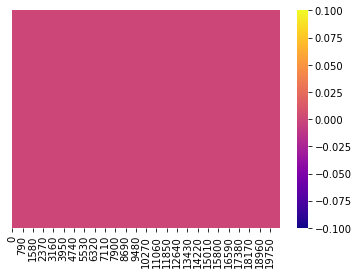

In [4]:
sns.heatmap(rna_df.transpose().isnull(),yticklabels=False, cmap='plasma')

# Read in proteinomics data

In [5]:
protein_raw_data = f'{cancer_type}__protein_iTRAQ_allPeptides.txt'
protein_df = pd.read_csv(protein_raw_data,sep='\t', engine='python')
protein_df

,GeneSymbol,Description,Organism,Chromosome,Locus,TCGA-09-1664-01A,TCGA-61-2094-01A,TCGA-25-1312-01A,TCGA-13-1409-01A,TCGA-24-1416-01A,...,TCGA-29-1710-01A,TCGA-36-1571-01A,TCGA-24-1553-01A,TCGA-13-1487-01A,TCGA-25-2396-01A,TCGA-36-2545-01A,TCGA-25-2404-01A,TCGA-24-1430-01A,TCGA-29-1697-01A,TCGA-13-2060-01A
0,A1BG,alpha-1-B glycoprotein,Homo sapiens,19,19q13.43,0.515161,0.239437,0.111174,-0.228490,0.061463,...,0.262207,0.413270,0.190755,-0.291833,0.383937,0.115800,0.285638,0.115665,-0.696717,-0.270755
1,A2M,alpha-2-macroglobulin,Homo sapiens,12,12p13.31,0.334774,0.233438,-0.290843,-0.434362,-0.704367,...,0.532937,-0.141038,-0.190684,-0.840177,0.172146,0.390139,0.004552,0.211033,-1.129088,-0.764951
2,A2ML1,alpha-2-macroglobulin like 1,Homo sapiens,12,12p13.31,NaN,NaN,NaN,-0.508910,-0.166451,...,1.125404,0.843415,-0.342300,-1.443284,-1.478000,-2.499321,-0.506899,-0.162166,-0.914920,-1.074971
3,AAAS,aladin WD repeat nucleoporin,Homo sapiens,12,12q13.13,-0.036627,0.129304,0.275859,0.167892,0.050235,...,-0.109304,0.164159,-0.074440,0.175893,-0.043370,-0.187802,-0.160502,-0.287937,-0.182414,0.155787
4,AACS,acetoacetyl-CoA synthetase,Homo sapiens,12,12q24.31,-0.102374,0.138217,0.360788,-0.392544,0.061181,...,-0.323207,0.479413,-0.375759,-0.382535,-0.281856,0.652703,-0.042160,0.284872,0.970068,0.409183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8592,ZWILCH,zwilch kinetochore protein,Homo sapiens,15,15q22.31,0.012708,0.242226,-0.018490,-0.219456,0.070620,...,-0.306367,0.279011,-0.286996,0.174637,NaN,NaN,0.265961,-0.002081,0.556252,0.165790
8593,ZYG11B,"zyg-11 family member B, cell cycle regulator",Homo sapiens,1,1p32.3,-0.230341,-0.290506,0.166450,0.049770,-0.289553,...,-0.148290,-0.360344,-0.068415,0.123730,0.140834,0.259095,-0.089389,-0.097320,1.457429,0.111328
8594,ZYX,zyxin,Homo sapiens,7,7q34,-0.222951,-0.213812,-0.095267,-0.190789,-0.413563,...,0.177989,0.039759,-0.150239,0.231272,0.360808,0.254634,0.243727,0.314604,-0.103301,0.358403
8595,ZZEF1,zinc finger ZZ-type and EF-hand domain contain...,Homo sapiens,17,17p13.2,0.144806,0.342081,-0.174097,-0.512154,-0.313680,...,0.329286,0.070800,0.075973,-0.023405,0.273201,0.175841,0.043257,0.156330,0.378702,0.312108


<AxesSubplot:>

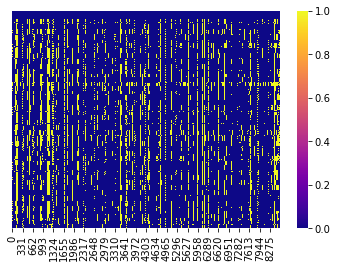

In [6]:
sns.heatmap(protein_df.transpose().isnull(),yticklabels=False, cmap='plasma')

# Read in tissue slide image data

In [7]:
image_raw_data = f'{cancer_type}_imData.csv'
image_df = pd.read_csv(image_raw_data)
image_df

,pid,imFeas_1,imFeas_2,imFeas_3,imFeas_4,imFeas_5,imFeas_6,imFeas_7,imFeas_8,imFeas_9,...,imFeas_141,imFeas_142,imFeas_143,imFeas_144,imFeas_145,imFeas_146,imFeas_147,imFeas_148,imFeas_149,imFeas_150
0,TCGA-09-2056-01,0.031517,0.147003,0.136353,0.138675,0.127463,0.112753,0.094388,0.081112,0.070409,...,3.214145,3.156379,3.003656,2.692919,2.695279,2.966793,2.919188,2.321796,2.063088,2.424123
1,TCGA-13-1410-01,0.026182,0.123931,0.122228,0.130256,0.129196,0.120908,0.105043,0.092287,0.080527,...,3.233181,3.149313,3.038765,2.696773,2.916812,3.086241,3.198461,2.632315,2.427609,2.546971
2,TCGA-13-1489-01,0.027191,0.106753,0.105309,0.116485,0.122253,0.124521,0.114946,0.104867,0.094815,...,3.254083,3.130472,3.089870,2.687598,2.935055,2.826507,2.914529,2.466126,2.234525,2.456447
3,TCGA-13-1497-01,0.031779,0.137281,0.137105,0.143786,0.133239,0.116768,0.096621,0.080729,0.066714,...,3.208236,3.130511,3.016070,2.643311,1.882398,1.634944,2.365161,2.350907,2.161781,2.310033
4,TCGA-13-1507-01,0.027231,0.132124,0.122723,0.124647,0.124054,0.118750,0.105009,0.091988,0.081644,...,3.237896,3.141330,3.056763,2.633651,3.036421,3.039842,3.075807,2.468896,2.226844,2.499994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,TCGA-F5-6864-01,0.233539,0.194242,0.155314,0.124802,0.097124,0.068869,0.048506,0.034413,0.024664,...,2.951164,3.112238,2.792501,3.068846,2.808900,2.843897,2.844154,2.087802,1.883995,2.146008
242,TCGA-G5-6233-01,0.170223,0.136446,0.116171,0.114637,0.109962,0.097931,0.083228,0.069840,0.057110,...,3.226659,3.163184,3.189612,2.905113,2.718803,2.670074,2.667100,1.853717,1.631919,2.079856
243,TCGA-G5-6235-01,0.216896,0.172579,0.141023,0.121178,0.100421,0.078029,0.059552,0.045812,0.036166,...,3.068337,3.148917,2.958132,3.029721,2.658196,2.653397,2.772909,1.922529,1.707439,2.099657
244,TCGA-G5-6572-01,0.212210,0.178243,0.145014,0.122936,0.102369,0.079261,0.058779,0.043740,0.032066,...,3.051758,3.200893,2.837399,3.120607,2.711138,2.780982,2.636948,2.598959,2.348130,2.608991


<AxesSubplot:>

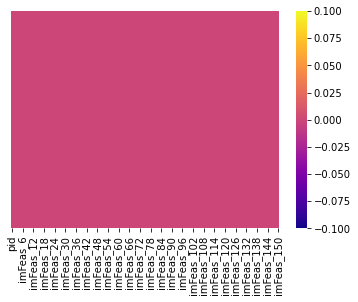

In [8]:
sns.heatmap(image_df.isnull(),yticklabels=False, cmap='plasma')

# Read in survival data

In [9]:
survival_raw_data = f'{cancer_type}_survival.xlsx'
survival_df = pd.read_excel(survival_raw_data, )
survival_df

,ID,Days to death,Vital Status
0,TCGA-OV / TCGA-09-2056,NaN,Alive
1,TCGA-OV / TCGA-13-1410,NaN,Alive
2,TCGA-OV / TCGA-13-1489,2553.0,Dead
3,TCGA-OV / TCGA-13-1497,NaN,Alive
4,TCGA-OV / TCGA-13-1507,1993.0,Dead
...,...,...,...
71,TCGA-OV / TCGA-61-1910,NaN,Alive
72,TCGA-OV / TCGA-24-1557,1213.0,Dead
73,TCGA-OV / TCGA-24-1555,2692.0,Dead
74,TCGA-OV / TCGA-24-1558,594.0,Dead


<AxesSubplot:>

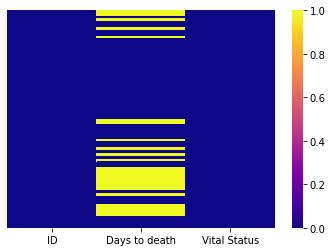

In [10]:
sns.heatmap(survival_df.isnull(),yticklabels=False, cmap='plasma')

# Data preprocessing

In [11]:
for x in rna_df.columns:
    if x.startswith('TCGA'):
        rna_df.rename(columns = {x:x [0:12]}, inplace = True) 
rna_df.columns

Index(['GeneSymbol', 'EntrezID', 'TCGA-04-1348', 'TCGA-04-1357',
       'TCGA-04-1362', 'TCGA-04-1364', 'TCGA-04-1365', 'TCGA-04-1514',
       'TCGA-04-1519', 'TCGA-09-0364',
       ...
       'TCGA-61-2102', 'TCGA-61-2104', 'TCGA-61-2109', 'TCGA-61-2110',
       'TCGA-61-2111', 'TCGA-61-2113', 'TCGA-OY-A56P', 'TCGA-OY-A56Q',
       'TCGA-VG-A8LO', 'TCGA-WR-A838'],
      dtype='object', length=311)

In [12]:
rna_df = rna_df.loc[:,~rna_df.columns.duplicated()]
rna_df

,GeneSymbol,EntrezID,TCGA-04-1348,TCGA-04-1357,TCGA-04-1362,TCGA-04-1364,TCGA-04-1365,TCGA-04-1514,TCGA-04-1519,TCGA-09-0364,...,TCGA-61-2102,TCGA-61-2104,TCGA-61-2109,TCGA-61-2110,TCGA-61-2111,TCGA-61-2113,TCGA-OY-A56P,TCGA-OY-A56Q,TCGA-VG-A8LO,TCGA-WR-A838
0,?,100133144,27.3245,21.9661,27.2611,18.6062,12.9998,3.5924,23.9875,25.9322,...,6.2856,25.4036,51.1181,25.4693,9.0243,26.7564,39.9677,32.3559,42.6347,156.2168
1,?,100134869,45.8134,36.6276,53.1619,14.4677,9.2994,11.6638,27.1918,49.5021,...,5.1100,51.9425,77.6188,86.4888,12.5908,15.8749,47.3948,28.2906,51.4148,104.8366
2,?,10357,24.0979,9.1146,32.1030,30.2498,68.5460,28.7075,38.6293,65.7950,...,25.1902,9.3525,22.8675,4.4259,16.6376,6.2899,14.9612,30.2799,23.1581,32.6951
3,?,10431,1509.2767,696.6146,1056.4202,1372.5640,1458.1889,1059.8733,1179.3502,557.4006,...,1233.7201,872.0951,793.4010,906.1458,882.6178,997.9907,454.7124,1008.3306,1039.6972,1129.1811
4,?,136542,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20525,ZYG11A,440590,5.6467,3.9062,56.5939,13.1447,7.2322,20.4375,2.6702,9.0340,...,8.9965,31.9319,10.0129,19.5331,71.4500,117.0612,28.5865,119.6268,6.4417,67.2818
20526,ZYG11B,79699,560.0968,600.2604,915.7627,811.5809,1031.7915,1082.6137,1251.0013,474.7391,...,826.4785,1031.0449,1057.5502,1080.9909,995.4968,776.4480,2075.0596,1157.2809,1528.9476,1236.0631
20527,ZYX,7791,15871.2019,5378.9062,6137.2982,5972.3706,7211.9934,5867.2855,16310.6364,4816.9533,...,18270.6927,7466.0280,9235.6840,15247.2606,4581.2068,6787.8047,10157.0254,10968.3439,8124.0035,6398.6928
20528,ZZEF1,23140,505.7811,805.3385,901.5315,372.7166,514.0877,885.1468,504.6729,973.4184,...,471.4166,1099.1662,700.9012,644.1162,570.9997,1382.7204,1519.6265,527.8241,834.2057,1959.2464


In [13]:
rna_df = rna_df[rna_df.GeneSymbol != '?']
rna_df

,GeneSymbol,EntrezID,TCGA-04-1348,TCGA-04-1357,TCGA-04-1362,TCGA-04-1364,TCGA-04-1365,TCGA-04-1514,TCGA-04-1519,TCGA-09-0364,...,TCGA-61-2102,TCGA-61-2104,TCGA-61-2109,TCGA-61-2110,TCGA-61-2111,TCGA-61-2113,TCGA-OY-A56P,TCGA-OY-A56Q,TCGA-VG-A8LO,TCGA-WR-A838
28,A1BG,1,66.4695,65.5664,41.6412,187.0368,23.9295,32.8123,46.3418,162.8522,...,63.7012,99.1485,38.3684,140.3668,94.7103,70.4394,43.1736,33.6854,27.9604,16.2092
29,A1CF,29974,0.0000,0.0000,0.3310,0.0000,0.0000,0.0000,0.0000,0.9034,...,0.0000,0.0000,0.0000,1.9057,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
30,RBFOX1,54715,0.2689,0.6510,4.3025,10.6006,6.3282,2.0150,402.3142,0.9034,...,0.0000,7.4508,328.5176,1125.7742,0.0000,0.6989,0.8015,339.2203,0.9663,0.3845
31,GGACT,87769,221.5219,141.2826,265.8161,94.2477,31.6318,46.4306,59.0165,143.1174,...,56.1022,166.9505,192.5380,51.4578,39.3515,52.9851,32.6046,86.3979,159.2044,92.2222
32,A2M,2,5899.8279,9384.4401,3350.4207,1455.2316,3999.3792,3224.5797,1986.1593,1487.3247,...,10264.1373,7220.7664,7200.1144,1819.9428,6179.7358,5365.7972,8773.5936,10006.7877,1888.1746,4205.6055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20525,ZYG11A,440590,5.6467,3.9062,56.5939,13.1447,7.2322,20.4375,2.6702,9.0340,...,8.9965,31.9319,10.0129,19.5331,71.4500,117.0612,28.5865,119.6268,6.4417,67.2818
20526,ZYG11B,79699,560.0968,600.2604,915.7627,811.5809,1031.7915,1082.6137,1251.0013,474.7391,...,826.4785,1031.0449,1057.5502,1080.9909,995.4968,776.4480,2075.0596,1157.2809,1528.9476,1236.0631
20527,ZYX,7791,15871.2019,5378.9062,6137.2982,5972.3706,7211.9934,5867.2855,16310.6364,4816.9533,...,18270.6927,7466.0280,9235.6840,15247.2606,4581.2068,6787.8047,10157.0254,10968.3439,8124.0035,6398.6928
20528,ZZEF1,23140,505.7811,805.3385,901.5315,372.7166,514.0877,885.1468,504.6729,973.4184,...,471.4166,1099.1662,700.9012,644.1162,570.9997,1382.7204,1519.6265,527.8241,834.2057,1959.2464


In [14]:
rna_df = rna_df.drop_duplicates(subset='GeneSymbol')
rna_df

,GeneSymbol,EntrezID,TCGA-04-1348,TCGA-04-1357,TCGA-04-1362,TCGA-04-1364,TCGA-04-1365,TCGA-04-1514,TCGA-04-1519,TCGA-09-0364,...,TCGA-61-2102,TCGA-61-2104,TCGA-61-2109,TCGA-61-2110,TCGA-61-2111,TCGA-61-2113,TCGA-OY-A56P,TCGA-OY-A56Q,TCGA-VG-A8LO,TCGA-WR-A838
28,A1BG,1,66.4695,65.5664,41.6412,187.0368,23.9295,32.8123,46.3418,162.8522,...,63.7012,99.1485,38.3684,140.3668,94.7103,70.4394,43.1736,33.6854,27.9604,16.2092
29,A1CF,29974,0.0000,0.0000,0.3310,0.0000,0.0000,0.0000,0.0000,0.9034,...,0.0000,0.0000,0.0000,1.9057,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
30,RBFOX1,54715,0.2689,0.6510,4.3025,10.6006,6.3282,2.0150,402.3142,0.9034,...,0.0000,7.4508,328.5176,1125.7742,0.0000,0.6989,0.8015,339.2203,0.9663,0.3845
31,GGACT,87769,221.5219,141.2826,265.8161,94.2477,31.6318,46.4306,59.0165,143.1174,...,56.1022,166.9505,192.5380,51.4578,39.3515,52.9851,32.6046,86.3979,159.2044,92.2222
32,A2M,2,5899.8279,9384.4401,3350.4207,1455.2316,3999.3792,3224.5797,1986.1593,1487.3247,...,10264.1373,7220.7664,7200.1144,1819.9428,6179.7358,5365.7972,8773.5936,10006.7877,1888.1746,4205.6055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20525,ZYG11A,440590,5.6467,3.9062,56.5939,13.1447,7.2322,20.4375,2.6702,9.0340,...,8.9965,31.9319,10.0129,19.5331,71.4500,117.0612,28.5865,119.6268,6.4417,67.2818
20526,ZYG11B,79699,560.0968,600.2604,915.7627,811.5809,1031.7915,1082.6137,1251.0013,474.7391,...,826.4785,1031.0449,1057.5502,1080.9909,995.4968,776.4480,2075.0596,1157.2809,1528.9476,1236.0631
20527,ZYX,7791,15871.2019,5378.9062,6137.2982,5972.3706,7211.9934,5867.2855,16310.6364,4816.9533,...,18270.6927,7466.0280,9235.6840,15247.2606,4581.2068,6787.8047,10157.0254,10968.3439,8124.0035,6398.6928
20528,ZZEF1,23140,505.7811,805.3385,901.5315,372.7166,514.0877,885.1468,504.6729,973.4184,...,471.4166,1099.1662,700.9012,644.1162,570.9997,1382.7204,1519.6265,527.8241,834.2057,1959.2464


In [15]:
rna_df.set_index('GeneSymbol', inplace=True)
rna_df

,EntrezID,TCGA-04-1348,TCGA-04-1357,TCGA-04-1362,TCGA-04-1364,TCGA-04-1365,TCGA-04-1514,TCGA-04-1519,TCGA-09-0364,TCGA-09-0366,...,TCGA-61-2102,TCGA-61-2104,TCGA-61-2109,TCGA-61-2110,TCGA-61-2111,TCGA-61-2113,TCGA-OY-A56P,TCGA-OY-A56Q,TCGA-VG-A8LO,TCGA-WR-A838
GeneSymbol,,,,,,,,,,,,,,,,,,,,,
A1BG,1,66.4695,65.5664,41.6412,187.0368,23.9295,32.8123,46.3418,162.8522,88.5518,...,63.7012,99.1485,38.3684,140.3668,94.7103,70.4394,43.1736,33.6854,27.9604,16.2092
A1CF,29974,0.0000,0.0000,0.3310,0.0000,0.0000,0.0000,0.0000,0.9034,0.0000,...,0.0000,0.0000,0.0000,1.9057,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
RBFOX1,54715,0.2689,0.6510,4.3025,10.6006,6.3282,2.0150,402.3142,0.9034,0.2274,...,0.0000,7.4508,328.5176,1125.7742,0.0000,0.6989,0.8015,339.2203,0.9663,0.3845
GGACT,87769,221.5219,141.2826,265.8161,94.2477,31.6318,46.4306,59.0165,143.1174,64.1588,...,56.1022,166.9505,192.5380,51.4578,39.3515,52.9851,32.6046,86.3979,159.2044,92.2222
A2M,2,5899.8279,9384.4401,3350.4207,1455.2316,3999.3792,3224.5797,1986.1593,1487.3247,10557.8325,...,10264.1373,7220.7664,7200.1144,1819.9428,6179.7358,5365.7972,8773.5936,10006.7877,1888.1746,4205.6055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,440590,5.6467,3.9062,56.5939,13.1447,7.2322,20.4375,2.6702,9.0340,9.0976,...,8.9965,31.9319,10.0129,19.5331,71.4500,117.0612,28.5865,119.6268,6.4417,67.2818
ZYG11B,79699,560.0968,600.2604,915.7627,811.5809,1031.7915,1082.6137,1251.0013,474.7391,691.6472,...,826.4785,1031.0449,1057.5502,1080.9909,995.4968,776.4480,2075.0596,1157.2809,1528.9476,1236.0631
ZYX,7791,15871.2019,5378.9062,6137.2982,5972.3706,7211.9934,5867.2855,16310.6364,4816.9533,12004.3214,...,18270.6927,7466.0280,9235.6840,15247.2606,4581.2068,6787.8047,10157.0254,10968.3439,8124.0035,6398.6928


In [16]:
rna_df = rna_df.drop('EntrezID',1)
rna_df

,TCGA-04-1348,TCGA-04-1357,TCGA-04-1362,TCGA-04-1364,TCGA-04-1365,TCGA-04-1514,TCGA-04-1519,TCGA-09-0364,TCGA-09-0366,TCGA-09-0367,...,TCGA-61-2102,TCGA-61-2104,TCGA-61-2109,TCGA-61-2110,TCGA-61-2111,TCGA-61-2113,TCGA-OY-A56P,TCGA-OY-A56Q,TCGA-VG-A8LO,TCGA-WR-A838
GeneSymbol,,,,,,,,,,,,,,,,,,,,,
A1BG,66.4695,65.5664,41.6412,187.0368,23.9295,32.8123,46.3418,162.8522,88.5518,192.7354,...,63.7012,99.1485,38.3684,140.3668,94.7103,70.4394,43.1736,33.6854,27.9604,16.2092
A1CF,0.0000,0.0000,0.3310,0.0000,0.0000,0.0000,0.0000,0.9034,0.0000,0.0000,...,0.0000,0.0000,0.0000,1.9057,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
RBFOX1,0.2689,0.6510,4.3025,10.6006,6.3282,2.0150,402.3142,0.9034,0.2274,21.1797,...,0.0000,7.4508,328.5176,1125.7742,0.0000,0.6989,0.8015,339.2203,0.9663,0.3845
GGACT,221.5219,141.2826,265.8161,94.2477,31.6318,46.4306,59.0165,143.1174,64.1588,124.4393,...,56.1022,166.9505,192.5380,51.4578,39.3515,52.9851,32.6046,86.3979,159.2044,92.2222
A2M,5899.8279,9384.4401,3350.4207,1455.2316,3999.3792,3224.5797,1986.1593,1487.3247,10557.8325,4603.9013,...,10264.1373,7220.7664,7200.1144,1819.9428,6179.7358,5365.7972,8773.5936,10006.7877,1888.1746,4205.6055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,5.6467,3.9062,56.5939,13.1447,7.2322,20.4375,2.6702,9.0340,9.0976,4.6595,...,8.9965,31.9319,10.0129,19.5331,71.4500,117.0612,28.5865,119.6268,6.4417,67.2818
ZYG11B,560.0968,600.2604,915.7627,811.5809,1031.7915,1082.6137,1251.0013,474.7391,691.6472,527.7984,...,826.4785,1031.0449,1057.5502,1080.9909,995.4968,776.4480,2075.0596,1157.2809,1528.9476,1236.0631
ZYX,15871.2019,5378.9062,6137.2982,5972.3706,7211.9934,5867.2855,16310.6364,4816.9533,12004.3214,5582.5479,...,18270.6927,7466.0280,9235.6840,15247.2606,4581.2068,6787.8047,10157.0254,10968.3439,8124.0035,6398.6928


In [17]:
protein_df = protein_df.dropna(axis=0)

In [18]:
for x in protein_df.columns:
    if x.startswith('TCGA'):
        protein_df.rename(columns = {x:x [0:12]}, inplace = True) 
protein_df = protein_df.loc[:,~protein_df.columns.duplicated()]
protein_df

c:\users\steve\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,GeneSymbol,Description,Organism,Chromosome,Locus,TCGA-09-1664,TCGA-61-2094,TCGA-25-1312,TCGA-13-1409,TCGA-24-1416,...,TCGA-29-1710,TCGA-36-1571,TCGA-24-1553,TCGA-13-1487,TCGA-25-2396,TCGA-36-2545,TCGA-25-2404,TCGA-24-1430,TCGA-29-1697,TCGA-13-2060
0,A1BG,alpha-1-B glycoprotein,Homo sapiens,19,19q13.43,0.515161,0.239437,0.111174,-0.228490,0.061463,...,0.262207,0.413270,0.190755,-0.291833,0.383937,0.115800,0.285638,0.115665,-0.696717,-0.270755
1,A2M,alpha-2-macroglobulin,Homo sapiens,12,12p13.31,0.334774,0.233438,-0.290843,-0.434362,-0.704367,...,0.532937,-0.141038,-0.190684,-0.840177,0.172146,0.390139,0.004552,0.211033,-1.129088,-0.764951
4,AACS,acetoacetyl-CoA synthetase,Homo sapiens,12,12q24.31,-0.102374,0.138217,0.360788,-0.392544,0.061181,...,-0.323207,0.479413,-0.375759,-0.382535,-0.281856,0.652703,-0.042160,0.284872,0.970068,0.409183
6,AAK1,AP2 associated kinase 1,Homo sapiens,2,2p13.3,-0.317308,0.167943,0.302028,0.270240,-0.257371,...,-0.018511,-0.245487,0.287935,-0.150633,0.094195,0.252284,-0.383185,0.007348,-0.288237,0.102370
7,AAMDC,adipogenesis associated Mth938 domain containing,Homo sapiens,11,11q14.1,-0.233326,0.256043,0.273234,0.398359,-0.105582,...,-0.234601,-0.613533,0.832852,0.402945,0.236353,-0.430322,-0.084029,-0.355185,-0.435648,-0.138923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8584,ZPR1,ZPR1 zinc finger,Homo sapiens,11,11q23.3,-0.267430,-0.194459,0.308090,-0.103861,0.151038,...,-0.354953,-0.139755,-0.093008,0.128057,-0.130096,0.006576,-0.051214,-0.158253,0.216785,0.330626
8585,ZRANB2,zinc finger RANBP2-type containing 2,Homo sapiens,1,1p31.1,-0.059680,-0.207537,0.285570,0.408663,0.259829,...,-0.139121,0.270060,0.148458,0.067631,0.127517,0.119195,-0.010574,-0.044541,0.539184,0.243731
8591,ZW10,zw10 kinetochore protein,Homo sapiens,11,11q23.2,0.054338,0.187472,0.344845,0.030237,0.055677,...,0.082480,0.082949,-0.019506,0.390554,0.065064,0.051615,-0.033337,-0.002537,0.157272,0.248640
8594,ZYX,zyxin,Homo sapiens,7,7q34,-0.222951,-0.213812,-0.095267,-0.190789,-0.413563,...,0.177989,0.039759,-0.150239,0.231272,0.360808,0.254634,0.243727,0.314604,-0.103301,0.358403


In [19]:
protein_df = protein_df.drop_duplicates(subset='GeneSymbol')
protein_df

,GeneSymbol,Description,Organism,Chromosome,Locus,TCGA-09-1664,TCGA-61-2094,TCGA-25-1312,TCGA-13-1409,TCGA-24-1416,...,TCGA-29-1710,TCGA-36-1571,TCGA-24-1553,TCGA-13-1487,TCGA-25-2396,TCGA-36-2545,TCGA-25-2404,TCGA-24-1430,TCGA-29-1697,TCGA-13-2060
0,A1BG,alpha-1-B glycoprotein,Homo sapiens,19,19q13.43,0.515161,0.239437,0.111174,-0.228490,0.061463,...,0.262207,0.413270,0.190755,-0.291833,0.383937,0.115800,0.285638,0.115665,-0.696717,-0.270755
1,A2M,alpha-2-macroglobulin,Homo sapiens,12,12p13.31,0.334774,0.233438,-0.290843,-0.434362,-0.704367,...,0.532937,-0.141038,-0.190684,-0.840177,0.172146,0.390139,0.004552,0.211033,-1.129088,-0.764951
4,AACS,acetoacetyl-CoA synthetase,Homo sapiens,12,12q24.31,-0.102374,0.138217,0.360788,-0.392544,0.061181,...,-0.323207,0.479413,-0.375759,-0.382535,-0.281856,0.652703,-0.042160,0.284872,0.970068,0.409183
6,AAK1,AP2 associated kinase 1,Homo sapiens,2,2p13.3,-0.317308,0.167943,0.302028,0.270240,-0.257371,...,-0.018511,-0.245487,0.287935,-0.150633,0.094195,0.252284,-0.383185,0.007348,-0.288237,0.102370
7,AAMDC,adipogenesis associated Mth938 domain containing,Homo sapiens,11,11q14.1,-0.233326,0.256043,0.273234,0.398359,-0.105582,...,-0.234601,-0.613533,0.832852,0.402945,0.236353,-0.430322,-0.084029,-0.355185,-0.435648,-0.138923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8584,ZPR1,ZPR1 zinc finger,Homo sapiens,11,11q23.3,-0.267430,-0.194459,0.308090,-0.103861,0.151038,...,-0.354953,-0.139755,-0.093008,0.128057,-0.130096,0.006576,-0.051214,-0.158253,0.216785,0.330626
8585,ZRANB2,zinc finger RANBP2-type containing 2,Homo sapiens,1,1p31.1,-0.059680,-0.207537,0.285570,0.408663,0.259829,...,-0.139121,0.270060,0.148458,0.067631,0.127517,0.119195,-0.010574,-0.044541,0.539184,0.243731
8591,ZW10,zw10 kinetochore protein,Homo sapiens,11,11q23.2,0.054338,0.187472,0.344845,0.030237,0.055677,...,0.082480,0.082949,-0.019506,0.390554,0.065064,0.051615,-0.033337,-0.002537,0.157272,0.248640
8594,ZYX,zyxin,Homo sapiens,7,7q34,-0.222951,-0.213812,-0.095267,-0.190789,-0.413563,...,0.177989,0.039759,-0.150239,0.231272,0.360808,0.254634,0.243727,0.314604,-0.103301,0.358403


In [20]:
protein_df.set_index('GeneSymbol', inplace=True)
protein_df

,Description,Organism,Chromosome,Locus,TCGA-09-1664,TCGA-61-2094,TCGA-25-1312,TCGA-13-1409,TCGA-24-1416,TCGA-29-1769,...,TCGA-29-1710,TCGA-36-1571,TCGA-24-1553,TCGA-13-1487,TCGA-25-2396,TCGA-36-2545,TCGA-25-2404,TCGA-24-1430,TCGA-29-1697,TCGA-13-2060
GeneSymbol,,,,,,,,,,,,,,,,,,,,,
A1BG,alpha-1-B glycoprotein,Homo sapiens,19,19q13.43,0.515161,0.239437,0.111174,-0.228490,0.061463,-0.219539,...,0.262207,0.413270,0.190755,-0.291833,0.383937,0.115800,0.285638,0.115665,-0.696717,-0.270755
A2M,alpha-2-macroglobulin,Homo sapiens,12,12p13.31,0.334774,0.233438,-0.290843,-0.434362,-0.704367,-0.270112,...,0.532937,-0.141038,-0.190684,-0.840177,0.172146,0.390139,0.004552,0.211033,-1.129088,-0.764951
AACS,acetoacetyl-CoA synthetase,Homo sapiens,12,12q24.31,-0.102374,0.138217,0.360788,-0.392544,0.061181,-0.010745,...,-0.323207,0.479413,-0.375759,-0.382535,-0.281856,0.652703,-0.042160,0.284872,0.970068,0.409183
AAK1,AP2 associated kinase 1,Homo sapiens,2,2p13.3,-0.317308,0.167943,0.302028,0.270240,-0.257371,-0.084925,...,-0.018511,-0.245487,0.287935,-0.150633,0.094195,0.252284,-0.383185,0.007348,-0.288237,0.102370
AAMDC,adipogenesis associated Mth938 domain containing,Homo sapiens,11,11q14.1,-0.233326,0.256043,0.273234,0.398359,-0.105582,-0.112915,...,-0.234601,-0.613533,0.832852,0.402945,0.236353,-0.430322,-0.084029,-0.355185,-0.435648,-0.138923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZPR1,ZPR1 zinc finger,Homo sapiens,11,11q23.3,-0.267430,-0.194459,0.308090,-0.103861,0.151038,0.353659,...,-0.354953,-0.139755,-0.093008,0.128057,-0.130096,0.006576,-0.051214,-0.158253,0.216785,0.330626
ZRANB2,zinc finger RANBP2-type containing 2,Homo sapiens,1,1p31.1,-0.059680,-0.207537,0.285570,0.408663,0.259829,-0.115709,...,-0.139121,0.270060,0.148458,0.067631,0.127517,0.119195,-0.010574,-0.044541,0.539184,0.243731
ZW10,zw10 kinetochore protein,Homo sapiens,11,11q23.2,0.054338,0.187472,0.344845,0.030237,0.055677,0.048314,...,0.082480,0.082949,-0.019506,0.390554,0.065064,0.051615,-0.033337,-0.002537,0.157272,0.248640


In [21]:
protein_df = protein_df.drop('Description',1)
protein_df = protein_df.drop('Organism',1)
protein_df = protein_df.drop('Chromosome',1)
protein_df = protein_df.drop('Locus',1)
protein_df

,TCGA-09-1664,TCGA-61-2094,TCGA-25-1312,TCGA-13-1409,TCGA-24-1416,TCGA-29-1769,TCGA-13-1489,TCGA-13-1482,TCGA-13-1504,TCGA-13-1492,...,TCGA-29-1710,TCGA-36-1571,TCGA-24-1553,TCGA-13-1487,TCGA-25-2396,TCGA-36-2545,TCGA-25-2404,TCGA-24-1430,TCGA-29-1697,TCGA-13-2060
GeneSymbol,,,,,,,,,,,,,,,,,,,,,
A1BG,0.515161,0.239437,0.111174,-0.228490,0.061463,-0.219539,0.201573,-0.052376,-0.343687,-0.660929,...,0.262207,0.413270,0.190755,-0.291833,0.383937,0.115800,0.285638,0.115665,-0.696717,-0.270755
A2M,0.334774,0.233438,-0.290843,-0.434362,-0.704367,-0.270112,-0.033711,-0.039962,-0.512034,-0.441337,...,0.532937,-0.141038,-0.190684,-0.840177,0.172146,0.390139,0.004552,0.211033,-1.129088,-0.764951
AACS,-0.102374,0.138217,0.360788,-0.392544,0.061181,-0.010745,-0.338327,-0.724862,0.103502,-0.452945,...,-0.323207,0.479413,-0.375759,-0.382535,-0.281856,0.652703,-0.042160,0.284872,0.970068,0.409183
AAK1,-0.317308,0.167943,0.302028,0.270240,-0.257371,-0.084925,0.048875,0.167448,0.315699,-0.433377,...,-0.018511,-0.245487,0.287935,-0.150633,0.094195,0.252284,-0.383185,0.007348,-0.288237,0.102370
AAMDC,-0.233326,0.256043,0.273234,0.398359,-0.105582,-0.112915,1.071590,-0.151980,-0.196479,0.833447,...,-0.234601,-0.613533,0.832852,0.402945,0.236353,-0.430322,-0.084029,-0.355185,-0.435648,-0.138923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZPR1,-0.267430,-0.194459,0.308090,-0.103861,0.151038,0.353659,0.613826,-0.103573,0.084492,-0.370269,...,-0.354953,-0.139755,-0.093008,0.128057,-0.130096,0.006576,-0.051214,-0.158253,0.216785,0.330626
ZRANB2,-0.059680,-0.207537,0.285570,0.408663,0.259829,-0.115709,-0.011057,0.080781,-0.263442,-0.151768,...,-0.139121,0.270060,0.148458,0.067631,0.127517,0.119195,-0.010574,-0.044541,0.539184,0.243731
ZW10,0.054338,0.187472,0.344845,0.030237,0.055677,0.048314,0.447873,-0.117632,0.162746,0.359995,...,0.082480,0.082949,-0.019506,0.390554,0.065064,0.051615,-0.033337,-0.002537,0.157272,0.248640


In [22]:
image_df = image_df.transpose()
image_df

,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,245
pid,TCGA-09-2056-01,TCGA-13-1410-01,TCGA-13-1489-01,TCGA-13-1497-01,TCGA-13-1507-01,TCGA-13-1511-01,TCGA-13-2060-01,TCGA-23-1122-01,TCGA-24-1103-01,TCGA-24-1416-01,...,TCGA-F5-6812-01,TCGA-F5-6813-01,TCGA-F5-6814-01,TCGA-F5-6861-01,TCGA-F5-6863-01,TCGA-F5-6864-01,TCGA-G5-6233-01,TCGA-G5-6235-01,TCGA-G5-6572-01,TCGA-G5-6641-01
imFeas_1,0.0315166,0.0261824,0.027191,0.0317788,0.0272314,0.0281056,0.0289852,0.0338521,0.0324329,0.0283144,...,0.234828,0.208456,0.0349053,0.219269,0.22084,0.233539,0.170223,0.216896,0.21221,0.20657
imFeas_2,0.147003,0.123931,0.106753,0.137281,0.132124,0.142875,0.146379,0.160867,0.130956,0.131338,...,0.199832,0.181208,0.176569,0.198124,0.185826,0.194242,0.136446,0.172579,0.178243,0.182061
imFeas_3,0.136353,0.122228,0.105309,0.137105,0.122723,0.132706,0.137083,0.15867,0.13036,0.119748,...,0.159569,0.155234,0.149854,0.162416,0.150701,0.155314,0.116171,0.141023,0.145014,0.148865
imFeas_4,0.138675,0.130256,0.116485,0.143786,0.124647,0.135418,0.138521,0.13483,0.1328,0.124467,...,0.122993,0.129366,0.145714,0.126973,0.121174,0.124802,0.114637,0.121178,0.122936,0.129937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
imFeas_146,2.96679,3.08624,2.82651,1.63494,3.03984,2.59411,3.0515,3.18904,2.28192,3.07671,...,2.8457,2.78902,1.80783,2.88386,2.77836,2.8439,2.67007,2.6534,2.78098,2.03325
imFeas_147,2.91919,3.19846,2.91453,2.36516,3.07581,2.94663,3.17536,3.16759,2.60024,2.91035,...,2.84243,2.81379,2.05065,2.76654,2.68348,2.84415,2.6671,2.77291,2.63695,2.32074
imFeas_148,2.3218,2.63232,2.46613,2.35091,2.4689,2.61158,2.65452,2.64551,2.5114,2.45631,...,2.13061,2.18181,2.22796,2.19777,2.15887,2.0878,1.85372,1.92253,2.59896,1.73748
imFeas_149,2.06309,2.42761,2.23452,2.16178,2.22684,2.39208,2.44106,2.43632,2.32683,2.20726,...,2.00761,2.02059,1.95957,2.06044,1.9904,1.88399,1.63192,1.70744,2.34813,1.58475


In [23]:
new_header = image_df.iloc[0]
image_df = image_df[1:] 
image_df.columns = new_header 
image_df

pid,TCGA-09-2056-01,TCGA-13-1410-01,TCGA-13-1489-01,TCGA-13-1497-01,TCGA-13-1507-01,TCGA-13-1511-01,TCGA-13-2060-01,TCGA-23-1122-01,TCGA-24-1103-01,TCGA-24-1416-01,...,TCGA-F5-6812-01,TCGA-F5-6813-01,TCGA-F5-6814-01,TCGA-F5-6861-01,TCGA-F5-6863-01,TCGA-F5-6864-01,TCGA-G5-6233-01,TCGA-G5-6235-01,TCGA-G5-6572-01,TCGA-G5-6641-01
imFeas_1,0.0315166,0.0261824,0.027191,0.0317788,0.0272314,0.0281056,0.0289852,0.0338521,0.0324329,0.0283144,...,0.234828,0.208456,0.0349053,0.219269,0.22084,0.233539,0.170223,0.216896,0.21221,0.20657
imFeas_2,0.147003,0.123931,0.106753,0.137281,0.132124,0.142875,0.146379,0.160867,0.130956,0.131338,...,0.199832,0.181208,0.176569,0.198124,0.185826,0.194242,0.136446,0.172579,0.178243,0.182061
imFeas_3,0.136353,0.122228,0.105309,0.137105,0.122723,0.132706,0.137083,0.15867,0.13036,0.119748,...,0.159569,0.155234,0.149854,0.162416,0.150701,0.155314,0.116171,0.141023,0.145014,0.148865
imFeas_4,0.138675,0.130256,0.116485,0.143786,0.124647,0.135418,0.138521,0.13483,0.1328,0.124467,...,0.122993,0.129366,0.145714,0.126973,0.121174,0.124802,0.114637,0.121178,0.122936,0.129937
imFeas_5,0.127463,0.129196,0.122253,0.133239,0.124054,0.130268,0.129269,0.125997,0.136987,0.12311,...,0.0943078,0.104334,0.122277,0.097006,0.0984385,0.0971242,0.109962,0.100421,0.102369,0.0985818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
imFeas_146,2.96679,3.08624,2.82651,1.63494,3.03984,2.59411,3.0515,3.18904,2.28192,3.07671,...,2.8457,2.78902,1.80783,2.88386,2.77836,2.8439,2.67007,2.6534,2.78098,2.03325
imFeas_147,2.91919,3.19846,2.91453,2.36516,3.07581,2.94663,3.17536,3.16759,2.60024,2.91035,...,2.84243,2.81379,2.05065,2.76654,2.68348,2.84415,2.6671,2.77291,2.63695,2.32074
imFeas_148,2.3218,2.63232,2.46613,2.35091,2.4689,2.61158,2.65452,2.64551,2.5114,2.45631,...,2.13061,2.18181,2.22796,2.19777,2.15887,2.0878,1.85372,1.92253,2.59896,1.73748
imFeas_149,2.06309,2.42761,2.23452,2.16178,2.22684,2.39208,2.44106,2.43632,2.32683,2.20726,...,2.00761,2.02059,1.95957,2.06044,1.9904,1.88399,1.63192,1.70744,2.34813,1.58475


In [24]:
for x in image_df.columns:
    if x.startswith('TCGA'):
        image_df.rename(columns = {x:x [0:12]}, inplace = True) 
image_df = image_df[0:100]
image_df

c:\users\steve\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


pid,TCGA-09-2056,TCGA-13-1410,TCGA-13-1489,TCGA-13-1497,TCGA-13-1507,TCGA-13-1511,TCGA-13-2060,TCGA-23-1122,TCGA-24-1103,TCGA-24-1416,...,TCGA-F5-6812,TCGA-F5-6813,TCGA-F5-6814,TCGA-F5-6861,TCGA-F5-6863,TCGA-F5-6864,TCGA-G5-6233,TCGA-G5-6235,TCGA-G5-6572,TCGA-G5-6641
imFeas_1,0.0315166,0.0261824,0.027191,0.0317788,0.0272314,0.0281056,0.0289852,0.0338521,0.0324329,0.0283144,...,0.234828,0.208456,0.0349053,0.219269,0.22084,0.233539,0.170223,0.216896,0.21221,0.20657
imFeas_2,0.147003,0.123931,0.106753,0.137281,0.132124,0.142875,0.146379,0.160867,0.130956,0.131338,...,0.199832,0.181208,0.176569,0.198124,0.185826,0.194242,0.136446,0.172579,0.178243,0.182061
imFeas_3,0.136353,0.122228,0.105309,0.137105,0.122723,0.132706,0.137083,0.15867,0.13036,0.119748,...,0.159569,0.155234,0.149854,0.162416,0.150701,0.155314,0.116171,0.141023,0.145014,0.148865
imFeas_4,0.138675,0.130256,0.116485,0.143786,0.124647,0.135418,0.138521,0.13483,0.1328,0.124467,...,0.122993,0.129366,0.145714,0.126973,0.121174,0.124802,0.114637,0.121178,0.122936,0.129937
imFeas_5,0.127463,0.129196,0.122253,0.133239,0.124054,0.130268,0.129269,0.125997,0.136987,0.12311,...,0.0943078,0.104334,0.122277,0.097006,0.0984385,0.0971242,0.109962,0.100421,0.102369,0.0985818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
imFeas_96,0.0352083,0.0459473,0.039908,0.0240072,0.0448049,0.0498146,0.0526103,0.0460379,0.0343838,0.0488272,...,0.0183514,0.0212577,0.02914,0.0199055,0.0215355,0.020484,0.0108313,0.0124584,0.0579293,0.00906136
imFeas_97,0.0135021,0.0253875,0.0183558,0.0106418,0.0202377,0.0267989,0.0289193,0.0258978,0.0159221,0.020755,...,0.00777717,0.00879334,0.0103408,0.00888303,0.00936747,0.0072555,0.00288001,0.00357053,0.0336193,0.00333688
imFeas_98,0.00359752,0.0100438,0.00538454,0.00375533,0.00533632,0.0106792,0.0110601,0.0125558,0.00535884,0.00532732,...,0.00220716,0.00234375,0.00234164,0.00275629,0.00272408,0.00163305,0.000542611,0.000845248,0.0138417,0.00109312
imFeas_99,0.000495096,0.00241204,0.000898828,0.000878291,0.000674769,0.00234206,0.00232376,0.0023123,0.00109042,0.000599664,...,0.000330994,0.000367647,0.000382734,0.000433286,0.000424486,0.000208725,0.000135653,0.000143436,0.00251512,0.000115065


In [25]:
feas = 'imFeasName.txt'
feas_df = pd.read_csv(feas,sep='\n', engine='python', header=None)[0:100]
feas_df

,0
0,area_bin1
1,area_bin2
2,area_bin3
3,area_bin4
4,area_bin5
...,...
95,distMin_bin6
96,distMin_bin7
97,distMin_bin8
98,distMin_bin9


In [26]:
image_df.index = feas_df[0]

## Matched patients

In [27]:
matched_id = rna_df.columns.intersection(protein_df.columns.intersection(image_df.columns))
matched_id

Index(['TCGA-09-2056', 'TCGA-13-1410', 'TCGA-13-1489', 'TCGA-13-1497',
       'TCGA-13-1507', 'TCGA-13-1511', 'TCGA-13-2060', 'TCGA-23-1122',
       'TCGA-24-1103', 'TCGA-24-1416', 'TCGA-24-1430', 'TCGA-24-1435',
       'TCGA-24-1436', 'TCGA-24-1474', 'TCGA-24-1544', 'TCGA-24-1548',
       'TCGA-24-1553', 'TCGA-24-1555', 'TCGA-24-1557', 'TCGA-24-1558',
       'TCGA-24-1562', 'TCGA-24-2024', 'TCGA-24-2033', 'TCGA-24-2261',
       'TCGA-24-2289', 'TCGA-24-2290', 'TCGA-24-2298', 'TCGA-25-1312',
       'TCGA-25-1313', 'TCGA-25-1318', 'TCGA-25-1322', 'TCGA-25-1323',
       'TCGA-25-1329', 'TCGA-25-1623', 'TCGA-25-1628', 'TCGA-25-1631',
       'TCGA-25-2396', 'TCGA-25-2397', 'TCGA-25-2399', 'TCGA-25-2404',
       'TCGA-25-2409', 'TCGA-29-1688', 'TCGA-29-1690', 'TCGA-29-1693',
       'TCGA-29-1696', 'TCGA-29-1697', 'TCGA-29-1698', 'TCGA-29-1702',
       'TCGA-29-1705', 'TCGA-29-1710', 'TCGA-29-1711', 'TCGA-29-1762',
       'TCGA-29-1763', 'TCGA-29-1770', 'TCGA-29-1785', 'TCGA-29-2427',
      

In [28]:
matched_gene = rna_df.index.intersection(protein_df.index)
matched_gene

Index(['A1BG', 'A2M', 'AACS', 'AAK1', 'AAMP', 'AARS1', 'AARSD1', 'AASDHPPT',
       'AATF', 'ABAT',
       ...
       'ZNF598', 'ZNF618', 'ZNF638', 'ZNF787', 'CHAMP1', 'ZNFX1', 'ZRANB2',
       'ZW10', 'ZYX', 'ZZEF1'],
      dtype='object', name='GeneSymbol', length=4616)

In [29]:
rna_df=rna_df[matched_id]
rna_df=rna_df.loc[matched_gene]
rna_df

,TCGA-09-2056,TCGA-13-1410,TCGA-13-1489,TCGA-13-1497,TCGA-13-1507,TCGA-13-1511,TCGA-13-2060,TCGA-23-1122,TCGA-24-1103,TCGA-24-1416,...,TCGA-61-1724,TCGA-61-1741,TCGA-61-1907,TCGA-61-1910,TCGA-61-1914,TCGA-61-1918,TCGA-61-1995,TCGA-61-2008,TCGA-61-2088,TCGA-61-2094
GeneSymbol,,,,,,,,,,,,,,,,,,,,,
A1BG,152.0849,287.3001,57.5135,93.2781,724.0000,120.1016,222.1982,129.8043,7.9529,78.5955,...,329.8109,27.0064,310.1218,26.4023,68.7224,167.8771,65.0279,161.1518,139.8443,107.0148
A2M,4322.5695,5060.4870,2100.8237,3932.2299,3105.9842,3203.7409,4258.3263,12059.0903,6094.1650,4339.3134,...,8535.9993,4617.3059,7146.3642,4219.1199,4212.4035,5168.4067,8756.5674,9388.1801,2341.1780,12316.8374
AACS,1100.1384,701.9847,498.4532,680.4621,442.2164,1387.1070,757.7750,477.5146,2157.5826,836.4544,...,698.7284,721.3329,560.5155,958.4139,655.2108,878.8976,1162.0008,652.3624,581.7333,1031.6922
AAK1,1072.8196,7039.6541,475.6381,559.7017,609.4987,2230.2318,1632.1875,2171.6444,828.5080,1270.2871,...,3275.8396,1641.2937,392.4736,1497.0986,904.9165,2604.5847,2259.7963,1941.5231,2414.1152,3565.2116
AAMP,2518.8740,2725.6880,3748.2599,2525.6642,2093.4037,2374.0870,4419.6774,2548.5754,3762.6706,2084.2697,...,2850.4271,2098.2250,1433.9949,3247.5822,1747.9402,2837.0086,2360.4037,2065.1473,3242.8646,1468.8725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNFX1,1223.8117,7017.1610,800.8507,1366.6942,1493.9314,2721.1813,1815.2642,2833.5050,3104.4488,1943.8202,...,5080.5347,3281.7162,2449.5769,1776.5957,1880.6897,1666.7425,2524.6431,2269.7054,1549.0400,4248.4885
ZRANB2,2014.1837,1100.5414,1530.0077,2268.4239,2356.8971,958.7742,1561.3745,1506.9207,1053.8752,1157.7278,...,1055.7711,1951.1358,1685.9055,3118.2689,1894.2464,1344.9769,1518.9506,1506.6326,3788.7494,1598.3097
ZW10,241.4398,467.9898,718.4841,697.3603,444.3272,371.5465,434.8071,313.7659,631.5560,332.0849,...,283.3388,569.3129,593.2217,190.5222,454.1657,501.2687,684.4741,594.9972,321.7436,489.2698


In [30]:
protein_df=protein_df[matched_id]
protein_df=protein_df.loc[matched_gene]
protein_df

,TCGA-09-2056,TCGA-13-1410,TCGA-13-1489,TCGA-13-1497,TCGA-13-1507,TCGA-13-1511,TCGA-13-2060,TCGA-23-1122,TCGA-24-1103,TCGA-24-1416,...,TCGA-61-1724,TCGA-61-1741,TCGA-61-1907,TCGA-61-1910,TCGA-61-1914,TCGA-61-1918,TCGA-61-1995,TCGA-61-2008,TCGA-61-2088,TCGA-61-2094
GeneSymbol,,,,,,,,,,,,,,,,,,,,,
A1BG,-0.246381,-0.035741,0.201573,-0.492555,-0.364644,-0.227778,-0.270755,0.516123,-0.041838,0.061463,...,-0.572692,-0.327510,-0.338531,-0.463659,-0.271400,0.221467,0.062611,0.931362,-0.271876,0.239437
A2M,0.499874,0.407090,-0.033711,-0.494733,-0.520179,-0.094671,-0.764951,0.556124,-0.105360,-0.704367,...,-0.646824,-0.157549,0.141596,-0.346649,-0.150674,-0.156248,-0.311775,0.079145,-0.503649,0.233438
AACS,0.536439,0.289201,-0.338327,0.099107,0.052496,0.569175,0.409183,0.372676,0.721812,0.061181,...,-0.146538,-0.178751,0.010550,0.022993,0.415120,0.163925,0.181866,-0.712378,0.483363,0.138217
AAK1,0.116041,0.872564,0.048875,-0.284606,-0.103077,0.064664,0.102370,-0.153207,-0.481375,-0.257371,...,0.564487,-0.234626,-0.635950,-0.295176,-0.084698,0.117323,-0.084654,-0.093453,-0.179366,0.167943
AAMP,0.118749,0.145701,0.537324,-0.159285,0.368837,-0.348322,0.772666,-0.097460,0.510617,0.035661,...,-0.148612,0.258129,-0.448530,0.481794,-0.214254,0.041985,0.206757,-0.328205,0.310020,-0.167559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNFX1,-0.076906,0.457255,0.015935,0.034685,0.203580,0.100042,0.061164,-0.111000,0.111379,-0.181430,...,0.352861,-0.165048,0.042713,-0.172751,0.658854,-0.417143,-0.081105,-0.210426,-0.011678,0.248410
ZRANB2,0.162208,-0.123976,-0.011057,0.276369,0.203612,-0.521477,0.243731,-0.223615,-0.154831,0.259829,...,-0.116658,0.421132,-0.056181,0.755178,0.088864,-0.061557,0.070300,0.220604,0.607484,-0.207537
ZW10,-0.090297,-0.065289,0.447873,0.313415,-0.113623,0.102774,0.248640,-0.017560,-0.096806,0.055677,...,-0.085904,-0.004010,0.002622,-0.266504,0.171510,-0.165282,0.229577,-0.105074,-0.307365,0.187472


In [31]:
image_df=image_df[matched_id]
image_df

pid,TCGA-09-2056,TCGA-13-1410,TCGA-13-1489,TCGA-13-1497,TCGA-13-1507,TCGA-13-1511,TCGA-13-2060,TCGA-23-1122,TCGA-24-1103,TCGA-24-1416,...,TCGA-61-1724,TCGA-61-1741,TCGA-61-1907,TCGA-61-1910,TCGA-61-1914,TCGA-61-1918,TCGA-61-1995,TCGA-61-2008,TCGA-61-2088,TCGA-61-2094
0,,,,,,,,,,,,,,,,,,,,,
area_bin1,0.0315166,0.0261824,0.027191,0.0317788,0.0272314,0.0281056,0.0289852,0.0338521,0.0324329,0.0283144,...,0.0278417,0.0373371,0.0288557,0.0367518,0.0272245,0.0299291,0.0266781,0.0282386,0.0370208,0.0290874
area_bin2,0.147003,0.123931,0.106753,0.137281,0.132124,0.142875,0.146379,0.160867,0.130956,0.131338,...,0.153331,0.147431,0.130779,0.132668,0.140143,0.11519,0.139689,0.138289,0.163703,0.126631
area_bin3,0.136353,0.122228,0.105309,0.137105,0.122723,0.132706,0.137083,0.15867,0.13036,0.119748,...,0.128704,0.128024,0.122127,0.131881,0.121792,0.11172,0.130865,0.120755,0.145389,0.122757
area_bin4,0.138675,0.130256,0.116485,0.143786,0.124647,0.135418,0.138521,0.13483,0.1328,0.124467,...,0.123985,0.12405,0.12651,0.136751,0.119406,0.119238,0.131255,0.120231,0.139163,0.130015
area_bin5,0.127463,0.129196,0.122253,0.133239,0.124054,0.130268,0.129269,0.125997,0.136987,0.12311,...,0.117567,0.118793,0.126654,0.133496,0.11913,0.122853,0.126638,0.11779,0.126269,0.13034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
distMin_bin6,0.0352083,0.0459473,0.039908,0.0240072,0.0448049,0.0498146,0.0526103,0.0460379,0.0343838,0.0488272,...,0.0692051,0.0372921,0.0316397,0.0102954,0.0756328,0.0337116,0.0472641,0.0658313,0.0329377,0.033765
distMin_bin7,0.0135021,0.0253875,0.0183558,0.0106418,0.0202377,0.0267989,0.0289193,0.0258978,0.0159221,0.020755,...,0.033679,0.0158779,0.0122932,0.00355685,0.0437709,0.0173274,0.0195554,0.039287,0.0151861,0.014895
distMin_bin8,0.00359752,0.0100438,0.00538454,0.00375533,0.00533632,0.0106792,0.0110601,0.0125558,0.00535884,0.00532732,...,0.00970049,0.0040315,0.00322177,0.00102812,0.0159993,0.00639341,0.00549904,0.0176945,0.0046951,0.00515357


In [32]:
for ind in survival_df.index: 
    survival_df['ID'][ind] = survival_df['ID'][ind][-12:]
survival_df = survival_df[survival_df['Days to death'].notna()]
survival_df.set_index('ID', inplace=True)
survival_df

c:\users\steve\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Days to death,Vital Status
ID,,
TCGA-13-1489,2553.0,Dead
TCGA-13-1507,1993.0,Dead
TCGA-13-1511,1650.0,Dead
TCGA-23-1122,1189.0,Dead
TCGA-24-1103,1646.0,Dead
TCGA-24-1430,863.0,Dead
TCGA-24-1435,1324.0,Dead
TCGA-24-1474,676.0,Dead
TCGA-24-1544,820.0,Dead


# Data visualization

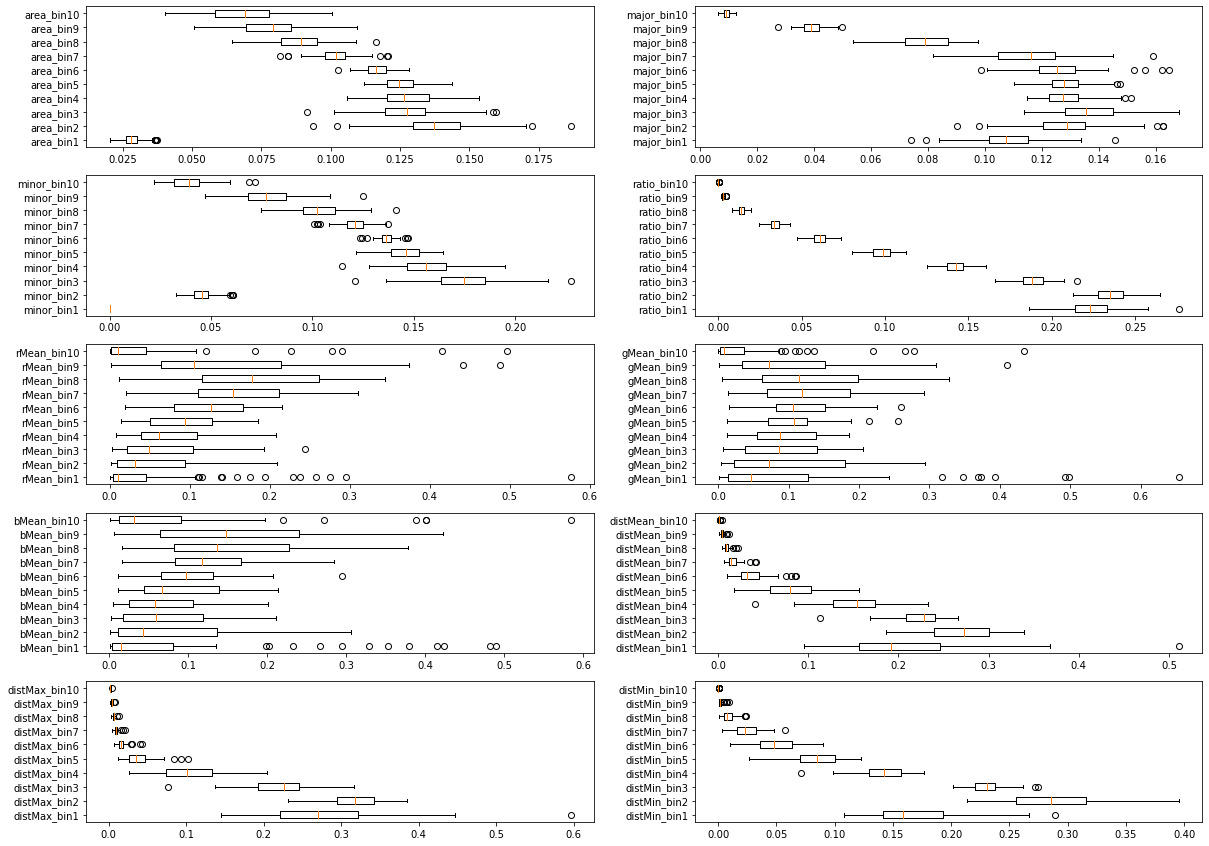

In [33]:
fig, ax = plt.subplots(5,2)
fig.set_figwidth(20)
fig.set_figheight(15)
for i in range(10):
    x = int(i/2)
    y = i - x*2
    ax[x,y].boxplot(image_df.to_numpy().tolist()[10*i:10*i+10],vert=0)
    ax[x,y].set_yticklabels(feas_df[0][10*i:10*i+10])

(array([5., 1., 3., 3., 8., 3., 6., 5., 4., 1., 2., 0., 3., 2., 1., 1., 0.,
        1., 1., 2.]),
 array([   9.  ,  143.15,  277.3 ,  411.45,  545.6 ,  679.75,  813.9 ,
         948.05, 1082.2 , 1216.35, 1350.5 , 1484.65, 1618.8 , 1752.95,
        1887.1 , 2021.25, 2155.4 , 2289.55, 2423.7 , 2557.85, 2692.  ]),
 <BarContainer object of 20 artists>)

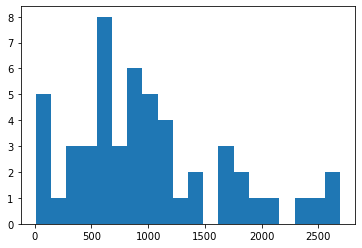

In [34]:
plt.hist(survival_df['Days to death'], bins = 20)

# Save data as csv

In [35]:
rna_df.to_csv(f'{cancer_type}_rna.csv')  
protein_df.to_csv(f'{cancer_type}_protein.csv')  
image_df.to_csv(f'{cancer_type}_image.csv')  
survival_df.to_csv(f'{cancer_type}_survival.csv')  